Programming for Data Analysis Project 2019

The problem statement is to synthesise simulate a data set.  I looked up some definitions of syntheise to make sure I understood the requirements of the project.  It is a method that uses statistical techniques to combine results from different studies and obtain a quantitative estimate of the overall effect of a particular intervention or variable on a defined outcome—i.e., it is a statistical process for pooling data from many clinical trials to glean a clear answer. https://medical-dictionary.thefreedictionary.com/data+synthesis.  But there can be some cons.  Bias, potential for analytical sloppiness, lack of understanding of basic issues, failure to consider major covariates, and overstating the strengths and precision of the results from Segen's Medical Dictionary.

When we were given the problem statement I decided to look into the National Car Testing statics.  My own one had recently had to under go one and while it failed the first time it passed the retest.  I started to wonder that if there was any correlation between the car year of manufacture, model and pass rate.  As the 2019 year data is incomplete I chose 2018 instead.  My car had also done the nct in 2018 and once again it had failed the original test but passed the retest.

Compulsory car testing was introduced in Ireland in 2000 as part of an EU Directive that makes car testing compulsory in all member states. It is an offence to drive a car without displaying a National Car Testing Service disc, if the car is liable for testing. Offenders will face Class C fines, as well as penalty points.

The test is called the National Car Test and is carried out on behalf of the Government by the National Car Testing Service Ltd (NCTS). The test is aimed at improving road safety and enhancing environmental protection. 

If a vehicle is over 4 years old it has to take a test.  From the vehicle being 4 years to under 10 years old it has to be tested every 2 years.  Once the vehicle gets to 10 years but less than 30, it then has to be tested every year.  Between 30 and 39 years old the vehicle must be tested every 2 years again and it can not be used for commercial purposes.  That would apply mostly to vintage cars that would be mostly for show only.  There are exemptions to the nct also.  Vehicles registered prior to 1st January 1980 so not need to be tested, cars permanently based on islands that are not connected to the mainland do not require testing and motor vehicles belonging to the Armed Forces, the Garda Síochána or the Fire Service are not subject to mandatory testing.

https://www.citizensinformation.ie/en/travel_and_recreation/vehicle_standards/national_car_test.html

The National Car Test is separate to the CVRT (Commercial Vehicle Roadworthiness Test), which was formerly known as DoE (Department of Environment) Test.  The Commercial Vehicle Roadworthiness Test (CVRT) is a roadworthiness test for all commercial vehicles, buses with more than eight passenger seats and ambulances, all over one year old.  There are two types of commercial vehicle tests, one for Light Commercial Vehicles (LCVs) and one for Heavy Commercial Vehicles (HCVs).
 
The LCV test is for:
all small goods vehicles with a gross vehicle weight (GVW) of 3,500 kg or less

The HCV test covers all other commercial vehicles including:
goods vehicles over 3,500 kg GVW
goods trailers over 3,500 kg GVW
buses with more than eight passenger seats
ambulances

https://www.cvrt.ie/en/About-CVRT/Pages/What%20is%20the%20CVRT.aspx






Initially, I began by looking at the the nct.ie to see what information was available.  There was a section on statistics which had the pass, fail refusal and fail dangerous rated for 2018.  https://www.ncts.ie/1127
This was interesting but I wanted to see if a particular make/model out performed the rest of them or were they all broadly similar.  I then looked into the central statistics office statbank which not only provided the figures of pass/fail rates, it also broke them down by each centre. https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=ROA10&PLanguage=0  

This was very interesting but still not what I was looking for.  I then went to the RSA website which had the information I was looking for. https://www.rsa.ie/RSA/Your-Vehicle/Your-Vehicle-/NCT-Statistics-/

https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp Female and male full and provisional licences

Before I even begin to look at the data there are some assumptions I have.  It will be interesting to see how it will turn out.  First, I expect that the newer cars will have a much higher pass rate than older ones.  I expect about half to fail the first time but the majority then pass the second time.  I expect of the ones which fail initially about 10% will be listed as fail dangerous.  This is based soley on my own observations from takling to my family and friends over the last few years.

Pass Rates

From the information provided by the RSA for 2018 over all there was approximately a 49% pass rate, 50% fail and 1% incomplete. Within all years of Hyundai Santa Fe's it changed to an approximate 36% pass, 63% fail and 1% incomplete rate. This information is available from https://www.rsa.ie/RSA/Your-Vehicle/Your-Vehicle-/NCT-Statistics-/


Fuel Type

There are two types of fuel which concern this dataset. Diesel and petrol.  I will have to add this variable as it is not included.  I again used statbank and got the breakdown for them. The information doesn not exist prior to 2010 and I only go up to 2015 for the nct so that is all I will import.  I plan to get a rough idea on the breakdown and apply it to my database.  I sourced this information from https://statbank.cso.ie/px/pxeirestat/statire/SelectVarVal/saveselections.asp


Sex

I obtained the 2018 information from https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp From the above it can be seen that 53% of males and 47% of females held full driving licences. The provisional licences were more evenly split with approximately 50% of each sexes. Overall, 92% of licences held in 2018 were Full and 8% were Provisional.

Mileage

Another variable I will add to my data is mileage and it will be split between petrol and diesel. I sourced the information from https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp and tidyied it up to suit my requirements as I think total mileage will have an effect on the pass/fail rate. The average km per year over a 14 year period (The information only goes to 2015 at the moment) for a petrol car is 13,489 and diesel is 19,598.

Import the data, libraries and rearrange.

In [55]:
# Import all required libraries


#Import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [56]:
pwd

'C:\\Users\\Rebecca\\Desktop\\Prog Data 2019\\Programming-for-Data-Analysis-Project-2019'

In [57]:
import os
import csv

In [58]:
#import csv -  I used this method as when I loaded it originally it was throwing up an error. I eventually realised it was a few lines of text which was at the start of the file.  I deleted it and the error message went.
# https://github.com/llSourcell/tensorflow_chatbot/issues/17
#df = pd.read_csv(r"C:/Users/Rebecca/Desktop/Prog Data 2019/Programming-for-Data-Analysis-Project-2019/nct18.csv", delimiter = ',' , encoding = 'unicode_escape')
#print (df)

Create Data Frame

In [59]:
df5 = pd.DataFrame(columns=["Year", "Fuel", "Status", "Sex", "Service"])



# Populate the data with the number of cars per year.
df5["Year"] = np.random.choice(["2001", "2002","2003","2004","2005","2006","2007","2008","2009",2010,2011,2012,2013,2014,2015], p=[0.004, 0.02, 0.044, 0.087, 0.149, 0.187, 0.221, 0.091, 0.012, 0.031, 0.009, 0.036, 0.013, 0.083, 0.013], size=(500))


# Create the fuel types
fuel = ["Petrol", "Diesel"]

# Populate the Fuel column with petrol and diesel, more diesel cars so do the weights accordingly.
df5["Fuel"] = np.random.choice(fuel, 500, p=[0.24, 0.76])



# Create the status types
status = ["Pass", "Fail", "Incomplete"]

# Populate the status column 
df5["Status"] = np.random.choice(status, 500, p=[0.36, 0.63, 0.01])

# Create the sexes
sex = ["Male", "Female"]

# Populate the column
df5["Sex"] = np.random.choice(sex, 500, p=[0.53, 0.47])

# Create the licence_type categories
Licence_Type = ["Full", "Learner"]

# Populate it
df5["Licence_type"] = np.random.choice(Licence_Type, 500, p=[0.92, 0.08])

# Define a function to map the mileage values.  I have calculated that the average mile for one year is 16544 and applied it for the newest model.  I have then increased it each year going backwards.  This will ensure that a 2002 car could have a higher mileage than a 2015.
def set_value(row_number, assigned_value):
    return np.random.randint(1,assigned_value[row_number])

#Create the dictionary
year_dictionary ={'2001' : 248160, '2002' : 231616, '2003' : 215072, "2004" : 198528, "2005" : 181984, "2006": 165440, "2007" : 148896, "2008" : 132352, "2009" :115808,"2010" :99264, "2011" :82720, "2012" :66176, "2013" :49632, "2014" :33088, "2015" :16544}

df5["Mileage"] = df5["Year"].apply(set_value, args =(year_dictionary, )) 

# Create the service types (Prior to nct)
Service = ["Yes", "No"]

# Populate the service column 
df5["Service"] = np.random.choice(Service, 500, p=[0.67, 0.33])

print (df5)

     Year    Fuel Status     Sex Service Licence_type  Mileage
0    2003  Petrol   Fail  Female     Yes         Full   120528
1    2006  Diesel   Fail  Female     Yes         Full    86198
2    2008  Petrol   Fail  Female     Yes      Learner    89433
3    2015  Diesel   Fail  Female      No         Full     6559
4    2005  Petrol   Pass  Female     Yes         Full   181096
5    2006  Diesel   Fail  Female      No         Full   132336
6    2006  Diesel   Fail    Male     Yes         Full    93895
7    2011  Diesel   Fail  Female     Yes         Full    77174
8    2002  Diesel   Fail  Female      No         Full   230626
9    2014  Petrol   Fail  Female     Yes         Full     1609
10   2006  Diesel   Pass    Male     Yes         Full   133576
11   2004  Petrol   Fail  Female      No         Full   143749
12   2005  Diesel   Fail  Female     Yes         Full    52502
13   2012  Diesel   Fail    Male     Yes         Full    55911
14   2008  Diesel   Pass    Male      No         Full  

In [60]:
df = pd.DataFrame(columns= ["Year", "Fuel", "Status", "Sex", "Licence_type", "Mileage", "Service"]) #gives headings to each of the columns
df

,Year,Fuel,Status,Sex,Licence_type,Mileage,Service


In [61]:
# Populate the data with the number of cars per year.
df["Year"] = np.random.choice(["2001", "2002","2003","2004","2005","2006","2007","2008","2009",2010,2011,2012,2013,2014,2015], p=[0.004, 0.02, 0.044, 0.087, 0.149, 0.187, 0.221, 0.091, 0.012, 0.031, 0.009, 0.036, 0.013, 0.083, 0.013], size=(500))

In [62]:
df.dtypes 

Year            object
Fuel            object
Status          object
Sex             object
Licence_type    object
Mileage         object
Service         object
dtype: object

In [63]:
# Create the fuel types
fuel = ["Petrol", "Diesel"]



In [64]:
# Populate the Fuel column with petrol and diesel, more diesel cars so do the weights accordingly.
df["Fuel"] = np.random.choice(fuel, 500, p=[0.24, 0.76])

In [65]:
# Create the status types
status = ["Pass", "Fail", "Incomplete"]

In [66]:
# Populate the status column 
df["Status"] = np.random.choice(status, 500, p=[0.36, 0.63, 0.01])


In [67]:
# Create the sexes
sex = ["Male", "Female"]

In [68]:
# Populate the column
df["Sex"] = np.random.choice(sex, 500, p=[0.53, 0.47])


In [69]:
# Create the licence_type categories
Licence_type = ["Full", "Learner"]

In [70]:
# Populate it
df["Licence_type"] = np.random.choice(Licence_type, 500, p=[0.92, 0.08])


In [71]:
# Define a function to map the mileage values.  I have calculated that the average mile for one year is 16544 and applied it for the newest model.  I have then increased it each year going backwards.  This will ensure that a 2002 car could have a higher mileage than a 2015.
def set_value(row_number, assigned_value):
    return np.random.randint(1,assigned_value[row_number])

#Create the dictionary
year_dictionary ={'2001' : 248160, '2002' : 231616, '2003' : 215072, "2004" : 198528, "2005" : 181984, "2006": 165440, "2007" : 148896, "2008" : 132352, "2009" :115808,"2010" :99264, "2011" :82720, "2012" :66176, "2013" :49632, "2014" :33088, "2015" :16544}

df["Mileage"] = df["Year"].apply(set_value, args =(year_dictionary, )) 



In [72]:
# Create the service types (Prior to nct)
Service = ["Yes", "No"]

# Populate the service column 
df["Service"] = np.random.choice(Service, 500, p=[0.67, 0.33])
df

,Year,Fuel,Status,Sex,Licence_type,Mileage,Service
0,2005,Diesel,Fail,Male,Full,62367,Yes
1,2003,Petrol,Pass,Female,Full,8989,Yes
2,2008,Petrol,Pass,Female,Full,117547,No
3,2007,Diesel,Fail,Female,Full,11771,No
4,2007,Petrol,Fail,Female,Full,110884,No
5,2007,Diesel,Pass,Male,Learner,113986,Yes
6,2012,Diesel,Fail,Female,Full,38178,Yes
7,2006,Diesel,Fail,Male,Full,42144,No
8,2006,Petrol,Fail,Female,Full,58873,Yes
9,2012,Petrol,Fail,Male,Full,64822,Yes


In [73]:
df.dtypes 

Year            object
Fuel            object
Status          object
Sex             object
Licence_type    object
Mileage          int64
Service         object
dtype: object

In [74]:
# Change datatype of year from object to integer so I can plot it. https://www.ritchieng.com/pandas-changing-datatype/
df["Year"] = df.Year.astype(int)

In [75]:
df.dtypes

Year             int32
Fuel            object
Status          object
Sex             object
Licence_type    object
Mileage          int64
Service         object
dtype: object

In [76]:
# Change datetype for mileage from int64 to int32 https://stackoverflow.com/questions/28910851/python-pandas-changing-some-column-types-to-categories
for col in ["Mileage"]:
    df[col] = df[col].astype("int32")
   

In [77]:
df.dtypes 

Year             int32
Fuel            object
Status          object
Sex             object
Licence_type    object
Mileage          int32
Service         object
dtype: object

In [78]:
df["Year"].mean()

2007.302

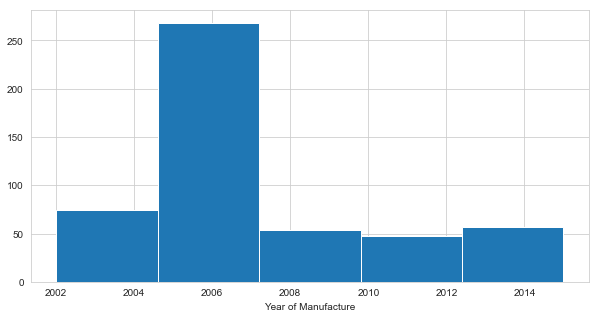

In [79]:
# Histogram showing the years of manufacture

plt.figure(figsize=(10,5))
plt.hist(df.Year, bins=5)
plt.xlabel('Year of Manufacture')
plt.show()

C:\Users\Rebecca\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


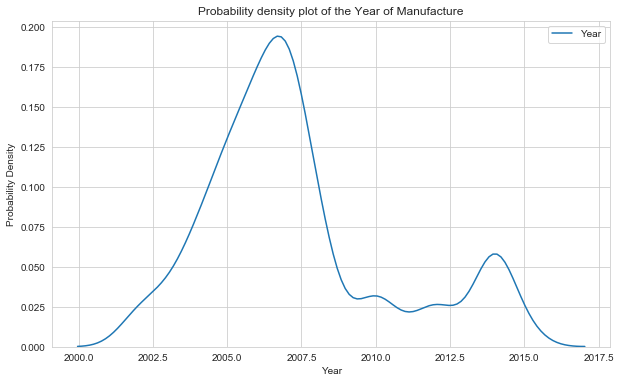

In [80]:

# A KDE plot is a lot like a histogram, it estimates the probability density of a continuous variable.
plt.figure(figsize=(10,6))
sns.kdeplot(df['Year'], label='Year')
plt.xlabel('Year')
plt.ylabel('Probability Density')
plt.title('Probability density plot of the Year of Manufacture')
plt.show()

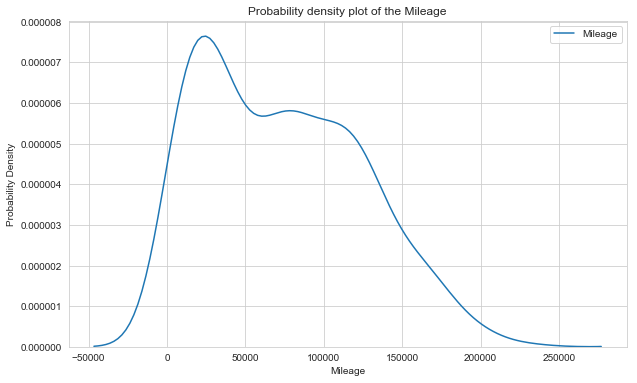

In [81]:

# A KDE plot is a lot like a histogram, it estimates the probability density of a continuous variable.
plt.figure(figsize=(10,6))
sns.kdeplot(df['Mileage'], label='Mileage')
plt.xlabel('Mileage')
plt.ylabel('Probability Density')
plt.title('Probability density plot of the Mileage')
plt.show()

In [82]:
df.groupby(by="Fuel").size()

Fuel
Diesel    374
Petrol    126
dtype: int64

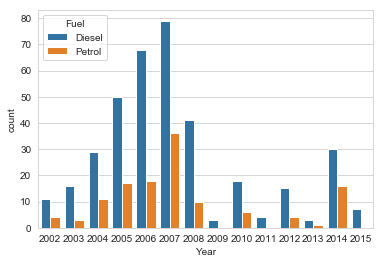

In [83]:
sns.countplot('Year', hue='Fuel', data=df)

In [84]:
stat= np.random.choice(status, 500, p=[0.36, 0.63, 0.01])
stat

array(['Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass',
       'Fail', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Pass',
       'Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass',
       'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Pass',
       'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail',
       'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail',
       'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Fail',
       'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail',
       'Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass',
       'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Fail',
       'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass',
       'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
       'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass',
       'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass',
      

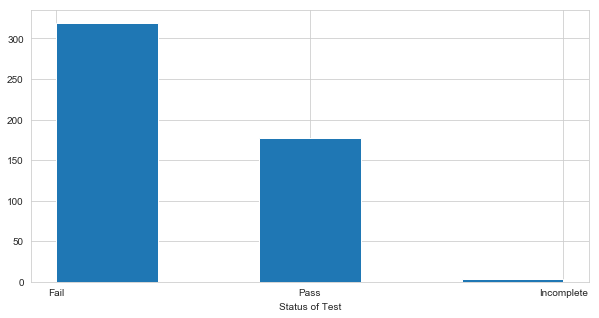

In [85]:
# Histogram showing the Status of Tests

plt.figure(figsize=(10,5))
plt.hist(stat, bins=5)
plt.xlabel('Status of Test')
plt.show()

C:\Users\Rebecca\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Rebecca\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Rebecca\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Rebecca\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


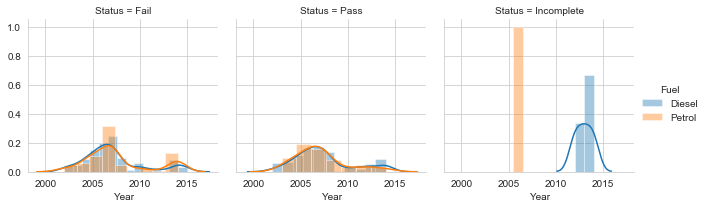

In [86]:

# KDE plots of the tip distribution separated by day and sex
g = sns.FacetGrid(df, col="Status", hue="Fuel") 
g.map(sns.distplot, "Year")
g.add_legend() 
g.set(alpha=.5)

In [87]:
gen =np.random.choice(sex, 500, p=[0.53, 0.47])
gen

array(['Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
  

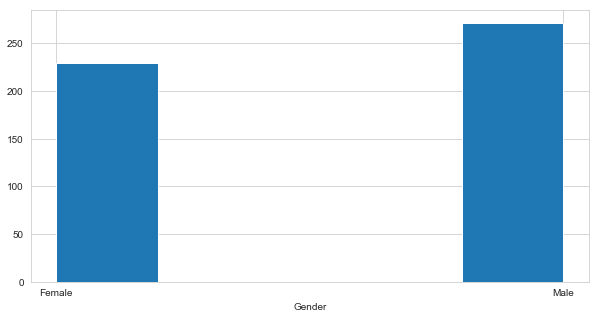

In [88]:
# Histogram showing the difference in the genders

plt.figure(figsize=(10,5))
plt.hist(gen, bins=5)
plt.xlabel("Gender")
plt.show()

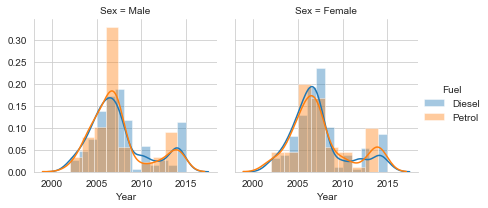

In [89]:

# KDE plots of the tip distribution separated by year and fuel type
g = sns.FacetGrid(df, col="Sex", hue="Fuel") 
g.map(sns.distplot, "Year")
g.add_legend() 
g.set(alpha=.5)

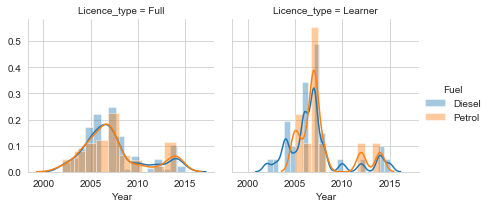

In [90]:

# KDE plots of the tip distribution separated by day and sex
g = sns.FacetGrid(df, col="Licence_type", hue="Fuel") 
g.map(sns.distplot, "Year")
g.add_legend() 
g.set(alpha=.5)

Text(0.5, 1.0, 'Mileage')

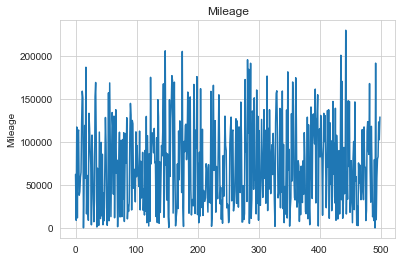

In [91]:
#df.Mileage
plt.plot(df.Mileage) # Plot the spread of Mileage
plt.ylabel("Mileage") # name the y label
plt.title("Mileage") # give the plot a title

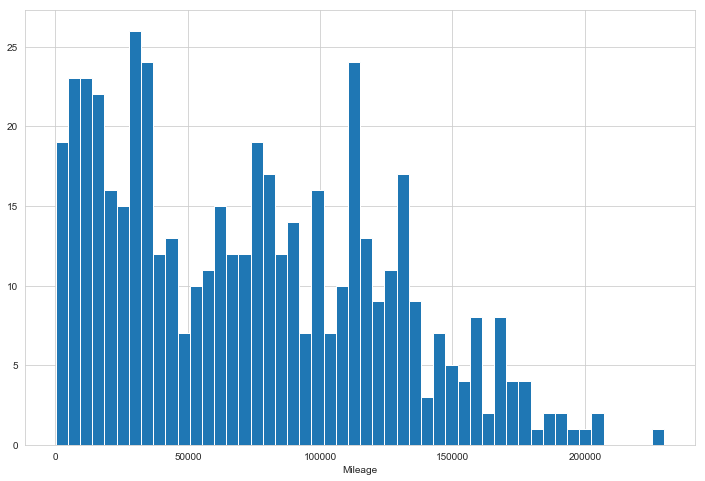

In [92]:
plt.figure(figsize=(12,8), facecolor='w', edgecolor='k', clear='True')
plt.hist(df.Mileage,  bins=50)
plt.xlabel("Mileage")
plt.show()

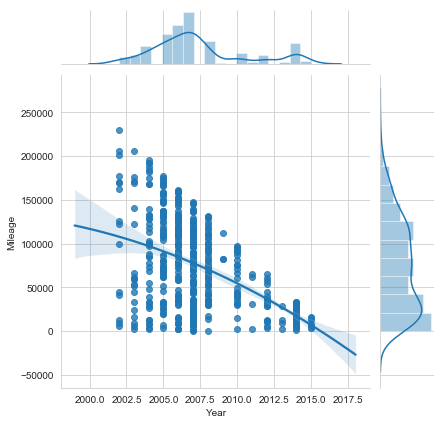

In [93]:
g = sns.JointGrid(x="Year", y="Mileage", data=df) 
g.plot_joint(sns.regplot, order=2) 
g.plot_marginals(sns.distplot)

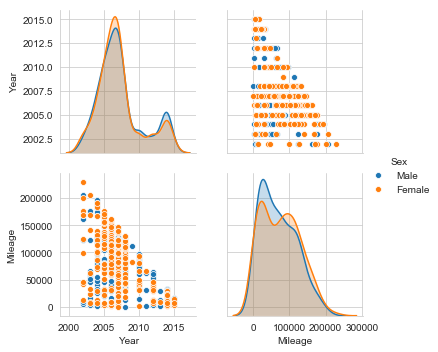

In [94]:
sns.pairplot(df, "Sex")

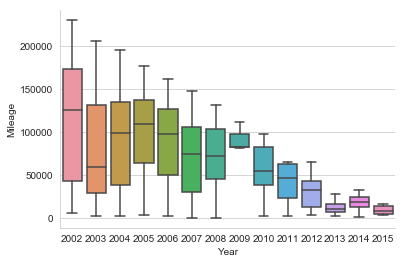

In [95]:
sns.set_style("whitegrid")
sns.boxplot(x="Year", y="Mileage", data = df)
sns.despine()
plt.show()

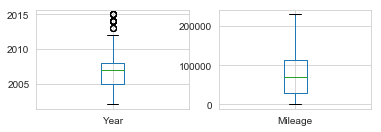

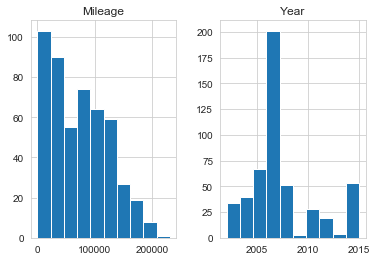

In [96]:

# box plots
# Graphs for the 'At Home Dataframe'
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# histograms 
df.hist()
plt.show()

#scatter plot matrix
#scatter_matrix(df)
#plt.show()